# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split

## Reading data

In [2]:
# Creating a empty dict, where I will save all parameters required for test data transformation
saved_dict = {}

In [3]:
# Reading datasets
dfs = []
for i in range(1, 5):
    path = '../data/UNSW-NB15_{}.csv' # There are 4 inputs csv files
    dfs.append(pd.read_csv(path.format(i), header=None))
all_data = pd.concat(dfs).reset_index(drop=True) # Concat all to a single df

/home/pail/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3134: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/pail/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3134: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
all_data.to_csv('../data/UNSW-NB15_full.csv')

In [5]:
# This csv file contains names of all the features
df_col = pd.read_csv('../data/NUSW-NB15_features.csv', encoding='ISO-8859-1')

In [6]:
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

In [7]:
# Renaming our dataframe with proper column names
all_data.columns = df_col['Name']

In [8]:
all_data.shape

(2540047, 49)

In [9]:
all_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


# Data cleaning and pre-processing

In [10]:
"""
Splitting data into train and test
All the operation like cleaning, EDA and FE will be done on train data only
"""

train, test = train_test_split(all_data, test_size=0.3, random_state=16)

In [11]:
# Deleting the concatenated dataframe, as we don't need that anymore
del all_data

In [ ]:
train.to_csv('../data/UNSW-NB15_training.csv')
test.to_csv('../data/UNSW-NB15_testing.csv')

In [32]:
print(train.shape, '\n', test.shape)

(1778032, 49) 
 (762015, 49)


In [33]:
# Checking for null values
train.isnull().sum()

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

## Filling Null values

In [34]:
train['attack_cat'].value_counts()

Generic             150906
Exploits             31507
 Fuzzers             13345
DoS                  11433
 Reconnaissance       8544
 Fuzzers              3569
Analysis              1855
Backdoor              1242
Reconnaissance        1220
 Shellcode             904
Backdoors              374
Shellcode              151
Worms                  120
Name: attack_cat, dtype: int64

In [35]:
# We don't have "normal" values for "attack_cat", so we must fill Null values with "normal"
train['attack_cat'] = train.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())

In [36]:
train['attack_cat'].value_counts()

normal            1552862
generic            150906
exploits            31507
fuzzers             16914
dos                 11433
reconnaissance       9764
analysis             1855
backdoor             1242
shellcode            1055
backdoors             374
worms                 120
Name: attack_cat, dtype: int64

# Information about dataset

In [37]:
# Getting name of all the columns
train.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object', name='Name')

## Class distribution

In [38]:
train_0, train_1 = train['label'].value_counts()[0] / len(train.index), train['label'].value_counts()[1] / len(train.index)
test_0, test_1 = test['label'].value_counts()[0] / len(test.index), test['label'].value_counts()[1] / len(test.index)

print("In Train: there are {} % of class 0 and {} % of class 1".format(train_0, train_1))
print("In Test: there are {} % of class 0 and {} % of class 1".format(test_0, test_1))

In Train: there are 0.8733599845222133 % of class 0 and 0.12664001547778667 % of class 1
In Test: there are 0.8738699369434985 % of class 0 and 0.1261300630565015 % of class 1


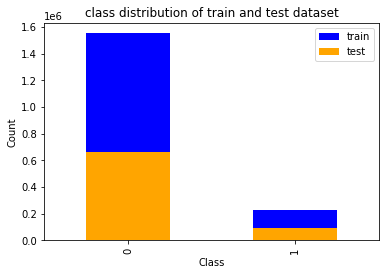

In [39]:
# Plotting target label distribution
plt.figure()
plt.title("class distribution of train and test dataset")
train['label'].value_counts().plot(kind="bar", color='b', label="train")
test['label'].value_counts().plot(kind="bar", color='orange', label="test")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend()
plt.show()

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1778032 entries, 81030 to 2079982
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit      

In [41]:
train[train['service']=='-']

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
81030,175.45.176.0,5060,149.171.126.18,4569,udp,INT,0.100437,178,0,254,...,0,2,2,1,1,1,1,1,normal,0
541834,59.166.0.8,15265,149.171.126.8,13292,tcp,FIN,0.014842,2542,23122,31,...,0,18,6,3,4,1,1,1,normal,0
863423,59.166.0.9,11505,149.171.126.3,6881,tcp,FIN,0.018598,1540,1644,31,...,0,8,8,10,10,6,1,7,normal,0
2365627,59.166.0.1,35425,149.171.126.3,40229,tcp,FIN,0.757895,4336,3080,31,...,,8,5,3,5,1,1,4,normal,0
2274935,175.45.176.0,22039,149.171.126.18,111,udp,INT,0.000008,168,0,254,...,,1,1,1,1,1,1,1,reconnaissance,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824041,175.45.176.1,26709,149.171.126.15,179,tcp,FIN,0.726300,614,268,254,...,,5,4,2,2,1,1,3,fuzzers,1
1557252,175.45.176.0,1047,149.171.126.18,445,tcp,FIN,1.609675,1106,912,254,...,,3,3,2,2,2,2,3,fuzzers,1
1620383,59.166.0.4,42780,149.171.126.6,111,udp,CON,0.004606,568,312,31,...,,6,6,5,6,1,1,4,normal,0
2244989,59.166.0.3,2609,149.171.126.8,111,udp,CON,0.397336,568,320,31,...,,3,2,1,2,1,1,1,normal,0


In [42]:
train['service'].replace('-', np.nan, inplace = True)

In [43]:
train

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
81030,175.45.176.0,5060,149.171.126.18,4569,udp,INT,0.100437,178,0,254,...,0,2,2,1,1,1,1,1,normal,0
1969394,149.171.126.15,1043,175.45.176.3,53,udp,INT,0.000008,264,0,60,...,,20,20,16,16,16,8,20,normal,0
541834,59.166.0.8,15265,149.171.126.8,13292,tcp,FIN,0.014842,2542,23122,31,...,0,18,6,3,4,1,1,1,normal,0
1070955,59.166.0.1,4951,149.171.126.9,21,tcp,FIN,0.807553,2934,3740,31,...,1,1,2,5,2,1,1,2,normal,0
863423,59.166.0.9,11505,149.171.126.3,6881,tcp,FIN,0.018598,1540,1644,31,...,0,8,8,10,10,6,1,7,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620383,59.166.0.4,42780,149.171.126.6,111,udp,CON,0.004606,568,312,31,...,,6,6,5,6,1,1,4,normal,0
2244989,59.166.0.3,2609,149.171.126.8,111,udp,CON,0.397336,568,320,31,...,,3,2,1,2,1,1,1,normal,0
98939,59.166.0.8,32959,149.171.126.6,53,udp,CON,0.001047,130,162,31,...,0,1,1,1,1,1,1,1,normal,0
98885,59.166.0.1,42869,149.171.126.4,5642,tcp,FIN,0.004920,3800,2456,31,...,0,7,8,4,3,1,1,3,normal,0


In [44]:
train.isnull().sum()

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service              872286
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [45]:
train.shape

(1778032, 49)

In [46]:
train.dropna(inplace=True)

In [47]:
train

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
1070955,59.166.0.1,4951,149.171.126.9,21,tcp,FIN,0.807553,2934,3740,31,...,1,1,2,5,2,1,1,2,normal,0
916662,59.166.0.4,62358,149.171.126.1,25,tcp,FIN,0.072593,37854,3380,31,...,0,1,1,3,1,1,1,1,normal,0
1046586,59.166.0.5,57496,149.171.126.2,53,udp,CON,0.001072,146,178,31,...,0,1,3,2,1,1,1,1,normal,0
1063099,59.166.0.1,62868,149.171.126.0,47026,tcp,FIN,0.048987,8928,424,31,...,0,3,3,6,4,1,1,4,normal,0
521750,59.166.0.7,39489,149.171.126.3,53,udp,CON,0.001136,146,178,31,...,0,2,3,4,2,1,1,1,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230172,59.166.0.7,52739,149.171.126.4,21,tcp,FIN,0.841500,2934,3742,31,...,1,1,2,7,9,1,1,4,normal,0
1069661,59.166.0.3,32346,149.171.126.5,53,udp,CON,0.001102,146,178,31,...,0,2,5,2,9,1,1,1,normal,0
532255,59.166.0.2,7346,149.171.126.3,53,udp,CON,0.001004,130,162,31,...,0,3,1,1,5,1,1,1,normal,0
879681,59.166.0.9,18776,149.171.126.3,53,udp,CON,0.001214,146,178,31,...,0,2,2,6,4,1,1,1,normal,0


In [54]:
# Select all columns of numeric types (including the label column if applicable)
num_col = train.select_dtypes(include='number').columns

# Select all columns of NON-numeric types (including the label column if applicable)
temp_col = train.columns.difference(num_col)
temp_col

Index(['attack_cat', 'ct_ftp_cmd', 'dsport', 'dstip', 'proto', 'service',
       'sport', 'srcip', 'state'],
      dtype='object', name='Name')

In [55]:
temp_col = temp_col.drop(['attack_cat', 'ct_ftp_cmd', 'dsport', 'dstip',
                        'sport', 'srcip']) # Remove the lable column
temp_col

Index(['proto', 'service', 'state'], dtype='object', name='Name')

In [56]:
# Creating a dataframe with only categorical attributes
data_cat = train[temp_col].copy()
data_cat

Name,proto,service,state
1070955,tcp,ftp,FIN
916662,tcp,smtp,FIN
1046586,udp,dns,CON
1063099,tcp,ftp-data,FIN
521750,udp,dns,CON
...,...,...,...
230172,tcp,ftp,FIN
1069661,udp,dns,CON
532255,udp,dns,CON
879681,udp,dns,CON


In [57]:
# ONE HOT ENCODING
# Convert data_cat into a df with numeric values by using pd.get_dummies() function
data_cat = pd.get_dummies(data_cat, columns=temp_col)
data_cat

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,...,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
1070955,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
916662,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1046586,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1063099,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
521750,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230172,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1069661,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
532255,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
879681,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
# First, concatenate data and data_cat
data = pd.concat([train, data_cat], axis=1)

# Then drop the non-numeric columns
data.drop(columns=temp_col, inplace=True)

data

,srcip,sport,dstip,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,...,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
1070955,59.166.0.1,4951,149.171.126.9,21,0.807553,2934,3740,31,29,11,...,0,0,0,0,0,0,1,0,0,0
916662,59.166.0.4,62358,149.171.126.1,25,0.072593,37854,3380,31,29,19,...,0,0,0,0,0,0,1,0,0,0
1046586,59.166.0.5,57496,149.171.126.2,53,0.001072,146,178,31,29,0,...,0,0,0,0,0,1,0,0,0,0
1063099,59.166.0.1,62868,149.171.126.0,47026,0.048987,8928,424,31,29,4,...,0,0,0,0,0,0,1,0,0,0
521750,59.166.0.7,39489,149.171.126.3,53,0.001136,146,178,31,29,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230172,59.166.0.7,52739,149.171.126.4,21,0.841500,2934,3742,31,29,11,...,0,0,0,0,0,0,1,0,0,0
1069661,59.166.0.3,32346,149.171.126.5,53,0.001102,146,178,31,29,0,...,0,0,0,0,0,1,0,0,0,0
532255,59.166.0.2,7346,149.171.126.3,53,0.001004,130,162,31,29,0,...,0,0,0,0,0,1,0,0,0,0
879681,59.166.0.9,18776,149.171.126.3,53,0.001214,146,178,31,29,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
num_col = data.select_dtypes(include='number').columns
num_col

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload',
       'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label',
       'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp',
       'service_ftp-data', 'service_http', 'service_irc', 'service_pop3',
       'service_radius', 'service_smtp', 'service_snmp', 'service_ssh',
       'service_ssl', 'state_ACC', 'state_CLO', 'state_CON', 'state_FIN',
       'state_INT', 'state_REQ', 'state_RST'],
      dtype='object')

In [60]:
len(num_col)

61

In [61]:
# Before normalization
data_before_normalization = data
data_before_normalization.head()

,srcip,sport,dstip,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,...,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
1070955,59.166.0.1,4951,149.171.126.9,21,0.807553,2934,3740,31,29,11,...,0,0,0,0,0,0,1,0,0,0
916662,59.166.0.4,62358,149.171.126.1,25,0.072593,37854,3380,31,29,19,...,0,0,0,0,0,0,1,0,0,0
1046586,59.166.0.5,57496,149.171.126.2,53,0.001072,146,178,31,29,0,...,0,0,0,0,0,1,0,0,0,0
1063099,59.166.0.1,62868,149.171.126.0,47026,0.048987,8928,424,31,29,4,...,0,0,0,0,0,0,1,0,0,0
521750,59.166.0.7,39489,149.171.126.3,53,0.001136,146,178,31,29,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
# Using minmax scaler for normalizing data
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df, col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scale.fit_transform(arr.reshape(len(arr), 1))
    return df

In [64]:
""" After normalization """
data = normalization(data.copy(), num_col)
data.head()

,srcip,sport,dstip,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,...,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
1070955,59.166.0.1,4951,149.171.126.9,21,0.013459,0.000294,0.000787,0.0,0.114625,0.002998,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
916662,59.166.0.4,62358,149.171.126.1,25,0.001210,0.003865,0.000712,0.0,0.114625,0.005179,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1046586,59.166.0.5,57496,149.171.126.2,53,0.000018,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1063099,59.166.0.1,62868,149.171.126.0,47026,0.000816,0.000907,0.000089,0.0,0.114625,0.001090,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521750,59.166.0.7,39489,149.171.126.3,53,0.000019,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [66]:
data_before_normalization.to_csv('../data/data_numerical/data_before_normalization_with_numerical_features.csv')

data.to_csv('../data/data_numerical/data_with_numerical_features.csv')